In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
%matplotlib inline

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


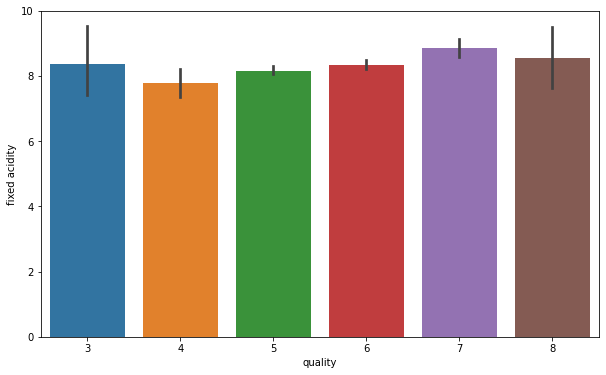

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

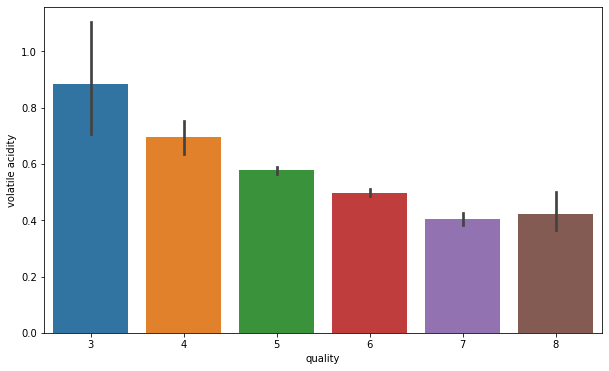

In [ ]:
fig = plt.figure(figsize = (10,6)) 
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

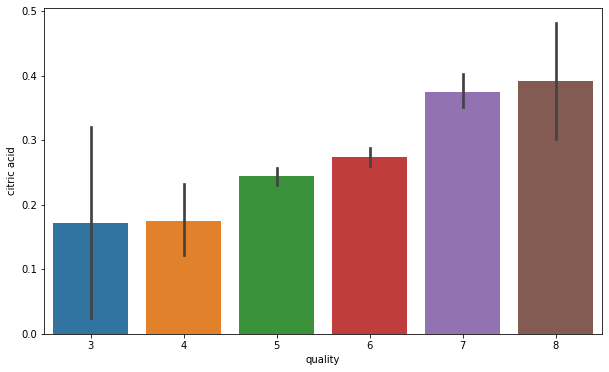

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

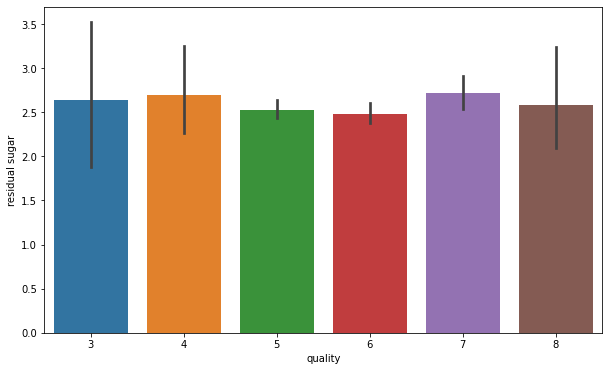

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)


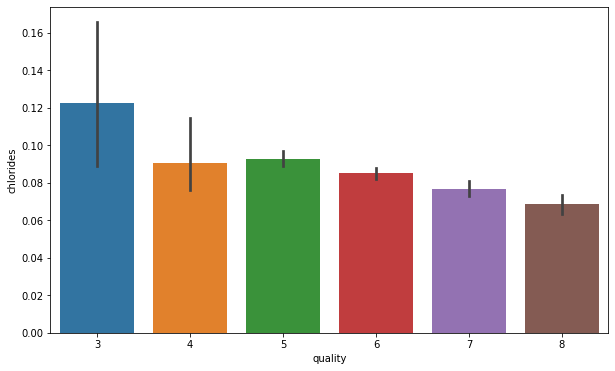

In [ ]:
fig  = plt.figure(figsize  = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

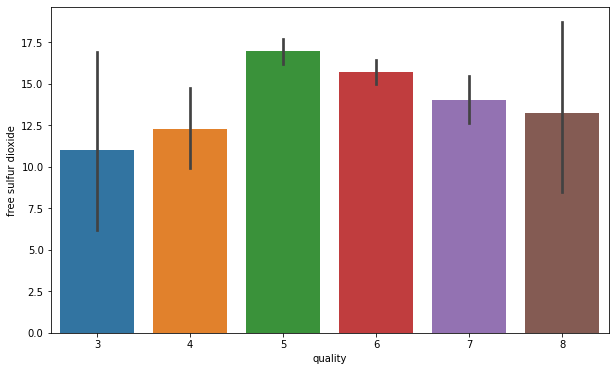

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

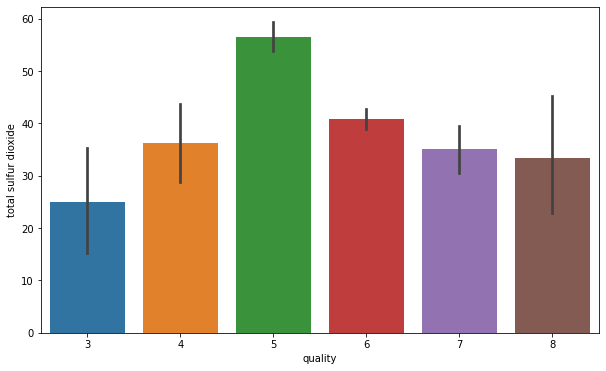

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

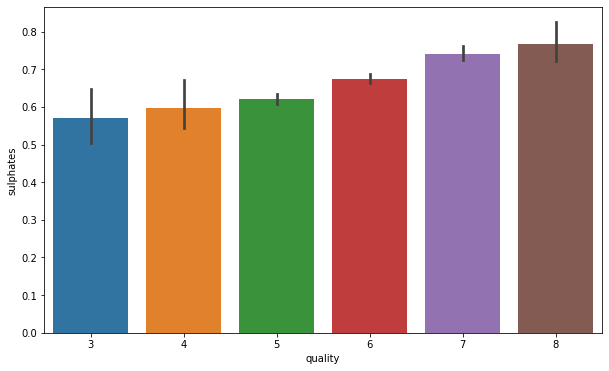

In [ ]:
fig  = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)


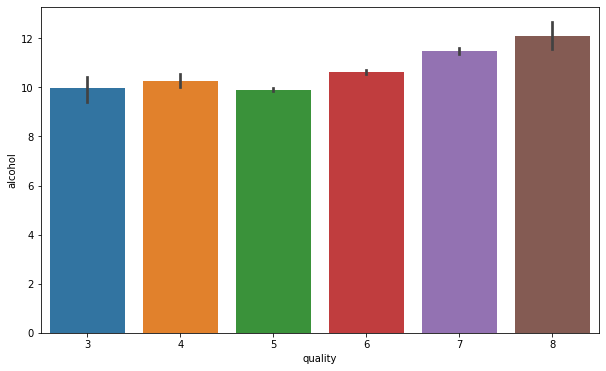

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
label_quality = LabelEncoder()

In [ ]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


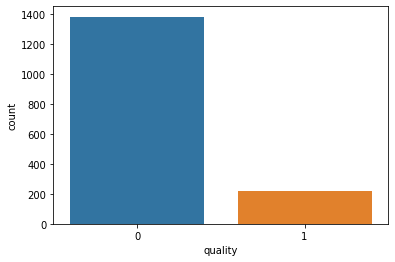

In [ ]:
sns.countplot(wine['quality'])

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression
#regressor = regressor.fit(X_train, y_train)
#Y_pred = regressor.predict(X_test)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)



In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



In [ ]:
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 29  18]]


In [ ]:
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(X_train,y_train)
rnd_score = rnd.score(X_test,y_test)

In [ ]:
x_predict = list(rnd.predict(X_test))
predicted_wine = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(predicted_wine).head(20)

,predicted_values,original_values
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
976,0,0
1493,0,0
706,0,0
613,0,0
1587,0,0


In [ ]:
import pickle
file = 'wine_quality'
save = pickle.dump(rnd,open(file,'wb'))